In [88]:
# Here are imported the libraries/modules that are used below for the analysis.

#%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import sklearn as sk
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
import seaborn as sns

In [89]:
# Here I use my local file path on reading the .csv files.
# The reader must use the appropriate path where files are located in their computers.

# I select as header the third row of the file gdp per capita (n=2). The delimiter is ","
GDP=pd.read_csv("/Users/damianejlli/Downloads/gdp per capita.csv", delimiter=",", header=2) 

# There is no need to specify the header for the "better life index.csv" file.
LS=pd.read_csv("/Users/damianejlli/Downloads/better life index.csv")

In [90]:
#I display some of the content of the GDP dataframe.

GDP.head() 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24713.698045,26189.435509,26647.938101,27980.880695,28281.350482,29007.693003,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,641.871479,637.165523,613.856689,578.466353,509.218661,519.884773,493.750418,507.103432,NaN,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3289.646664,2790.726615,NaN,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5353.244856,NaN,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,38686.461264,39538.766722,41303.929371,35762.523074,37474.665406,38962.880354,41793.055258,40886.391165,NaN,NaN


In [91]:
# I select the columns "Country Name" and year "2015" for the analysis in the GDP dataframe.

GPD1=GDP.loc[:,["Country Name", '2015']] 

In [92]:
# I display the GDP1 dataframe content.

GPD1

,Country Name,2015
0,Aruba,27980.880695
1,Afghanistan,578.466353
2,Angola,4166.979684
3,Albania,3952.801215
4,Andorra,35762.523074
...,...,...
259,Kosovo,3603.025501
260,"Yemen, Rep.",1602.037841
261,South Africa,5734.633629
262,Zambia,1337.795586


In [93]:
# I set as index the "Country Name" column and rename the column "2015" to "GPD per capita 2015 (USD)"
# and I set the dataframe in alphabetic order

GDP2=GPD1.set_index("Country Name").rename(columns={"2015": "GDP per capita 2015 (USD)"}).sort_index()

In [94]:
# I show the first ten rows of the GDP2 dataframe as a matter of example
# print(GDP2.to_string())

GDP2.head(10)

,GDP per capita 2015 (USD)
Country Name,
Afghanistan,578.466353
Albania,3952.801215
Algeria,4187.509727
American Samoa,11843.331183
Andorra,35762.523074
Angola,4166.979684
Antigua and Barbuda,14286.093160
Arab World,6400.360350
Argentina,13789.060425


In [95]:
# I show the first five rows of the LS dataframe as a matter of example.

LS.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [96]:
# I show the shape of the LS dataframe. It has 2369 rows and 17 columns.

LS.shape 

(2369, 17)

In [97]:
# I use a conditional to choose all those rows with values "Life satisfaction" in the column "Indicator" 
# and all those equal to "TOT" in the "INEQUALITY" column in the LS dataframe. 
# "TOT" is the total value of life satisfaction for men and women in a given country.

LS1=LS[(LS["Indicator"]=="Life satisfaction") & (LS["INEQUALITY"]=="TOT")] 

In [98]:
# I show the first 10 entries of the LS1 dataframe as a matter of exmple.

LS1.head(10)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
1813,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
1814,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.1,NaN,NaN
1815,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN
1816,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.4,NaN,NaN
1817,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.7,NaN,NaN
1818,DNK,Denmark,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.6,NaN,NaN
1819,FIN,Finland,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.6,NaN,NaN
1820,FRA,France,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.5,NaN,NaN
1821,DEU,Germany,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.0,NaN,NaN
1822,GRC,Greece,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,5.4,NaN,NaN


In [99]:
# First, in the LS1 dataframe, I rename the columns "Country" and "Value" respectively to "Country Name" and "Life Satisfaction Value".
# Second, I set as index of the new dataframe the "Country Name" and after I select all rows in the "Indicator" column 
# with entries equal to "Life Satisfaction Value". After the results are sorted alphabetically.

LS2=LS1.rename(columns={"Country" : "Country Name", "Value": "Life Satisfaction Value"}).set_index("Country Name").loc[:, ["Life Satisfaction Value"]].sort_index()

In [100]:
# I show the first 10 entries of the LS2 dataframe as a matter of exmple.

LS2.head(10)

,Life Satisfaction Value
Country Name,
Australia,7.3
Austria,7.1
Belgium,6.9
Brazil,6.4
Canada,7.4
Chile,6.5
Colombia,6.3
Czech Republic,6.7
Denmark,7.6


In [101]:
# I remove the entry "OECD-Total" country index from the LS2 dataframe because it is unneccessary for the analysis.

LS3=LS2[LS2.index != "OECD - Total"] 

In [102]:
# I show the first 10 entries of the LS3 dataframe as a matter of exmple.

LS3.head(10)

,Life Satisfaction Value
Country Name,
Australia,7.3
Austria,7.1
Belgium,6.9
Brazil,6.4
Canada,7.4
Chile,6.5
Colombia,6.3
Czech Republic,6.7
Denmark,7.6


In [103]:
# I join the LS3 dataframe with the GPD2 dataframe in order to form the final dataframe, df.

df=LS3.join(GDP2) 

In [104]:
# I display the entries in the joint dataframe, df.

df

,Life Satisfaction Value,GDP per capita 2015 (USD)
Country Name,,
Australia,7.3,56755.721712
Austria,7.1,44178.047378
Belgium,6.9,40991.808138
Brazil,6.4,8814.000987
Canada,7.4,43585.511982
Chile,6.5,13574.171831
Colombia,6.3,6175.876030
Czech Republic,6.7,17829.698322
Denmark,7.6,53254.856370


In [105]:
# I remove the NaN values from the "df" dataframe to form the final dataframe for the analysis, "df1".

df1=df.dropna()

In [106]:
# I display the df1 dataframe.

df1

,Life Satisfaction Value,GDP per capita 2015 (USD)
Country Name,,
Australia,7.3,56755.721712
Austria,7.1,44178.047378
Belgium,6.9,40991.808138
Brazil,6.4,8814.000987
Canada,7.4,43585.511982
Chile,6.5,13574.171831
Colombia,6.3,6175.876030
Czech Republic,6.7,17829.698322
Denmark,7.6,53254.856370


In [107]:
# I calculate the shape of the df1 dataframe. The dataframe has 38 rows and 2 columns.

df1.shape

(38, 2)

<AxesSubplot:xlabel='GDP per capita 2015 (USD)', ylabel='Life Satisfaction Value'>

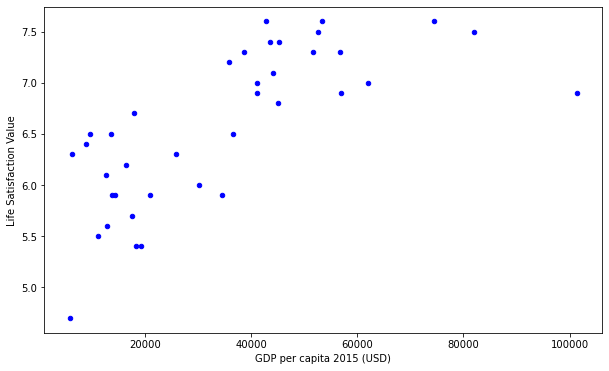

In [108]:
# I create a scatter plot for the data in the df1 dataframe.

df1.plot(kind="scatter", x="GDP per capita 2015 (USD)", y="Life Satisfaction Value", color="b", figsize=(10,6)) 

In [109]:
# I calculate the Pearson correlation coeffeicient r for the data in the df1 dataframe 
# and display the correlation dataframe.

df1.corr()

,Life Satisfaction Value,GDP per capita 2015 (USD)
Life Satisfaction Value,1.000000,0.720287
GDP per capita 2015 (USD),0.720287,1.000000


In [110]:
# I extract all values of the "GPD per capita 2015 (USD)" and "Life Satisfaction Value" columns and  
# form new (38x1) column arrays "a" and "b".

a=df1.loc[:, ["GDP per capita 2015 (USD)"]].values
b=df1.loc[:, ["Life Satisfaction Value"]].values 

In [111]:
# I reshape the original (38x1) column arrary "a" to a (1x38) row array "X".

X=a.reshape(38)

In [112]:
# I display the "X" array.

X

array([ 56755.72171242,  44178.04737774,  40991.80813814,   8814.00098681,
        43585.51198178,  13574.17183072,   6175.8760297 ,  17829.69832237,
        53254.85637009,  17522.23018625,  42784.69836164,  36638.18492916,
        41086.72967373,  18167.77372717,  12706.89121489,  52564.42917946,
        61995.42280258,  35776.79516181,  30230.22630213,  34524.46986093,
        13774.60527391,  14258.22933451, 101376.49657434,   9616.64500569,
        45175.23189338,  38615.99518491,  74355.51585756,  12578.49547344,
        19242.3664711 ,  16310.988409  ,  20881.76692993,   5734.63362915,
        25732.01836475,  51545.48360953,  82081.59716162,  11006.2497364 ,
        44974.83187718,  56839.38177423])

In [113]:
# I reshape the original (38x1) column "b" array to a (1x38) row array "y".

y=b.reshape(38) 

In [114]:
# I display the "y" array. 
y

array([7.3, 7.1, 6.9, 6.4, 7.4, 6.5, 6.3, 6.7, 7.6, 5.7, 7.6, 6.5, 7. ,
       5.4, 5.6, 7.5, 7. , 7.2, 6. , 5.9, 5.9, 5.9, 6.9, 6.5, 7.4, 7.3,
       7.6, 6.1, 5.4, 6.2, 5.9, 4.7, 6.3, 7.3, 7.5, 5.5, 6.8, 6.9])

In [115]:
# First, I assume a simple linear regression model for the data in "X" and "y" arrays 
# and calculate the slope, intercept etc., of the linear regression method. 
# Here I use the "stats" module of "Scipy" library and its linear regression built in method.

result = sp.stats.linregress(X, y)

In [116]:
# I print the results of the simple linear regression method.

print(result)

LinregressResult(slope=2.3996299825729615e-05, intercept=5.7417543537553195, rvalue=0.7202871953226535, pvalue=3.426556470065171e-07, stderr=3.851624914535905e-06, intercept_stderr=0.15853194959552194)


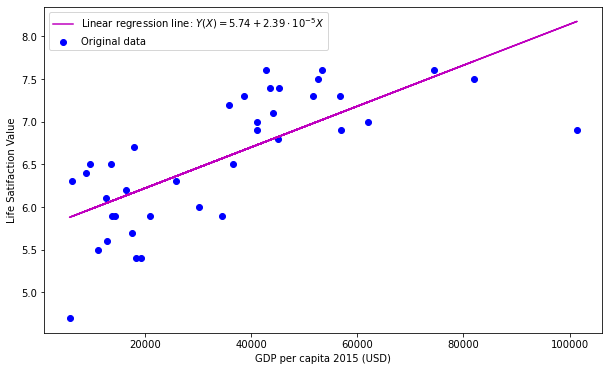

In [117]:
# I create a figure with a single subplot where the original data of the df1 dataframe 
# and the linear regression line Y(X) are shown.

fig, ax=plt.subplots(figsize=(10, 6))
ax.scatter(X, y, color='b', label="Original data")
ax.plot(X, result.intercept + (result.slope)*X, color="m", label="Linear regression line: $Y(X)=5.74+2.39\cdot 10^{-5} X$")
ax.set_xlabel("GDP per capita 2015 (USD)")
ax.set_ylabel("Life Satifaction Value")
plt.legend()

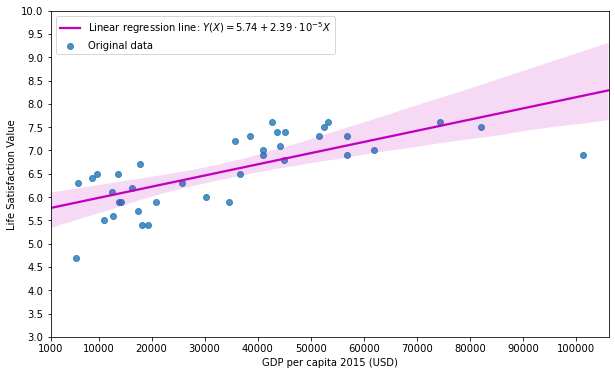

In [118]:
# I show the linear regression line together with the 95% confidence interval for the regression parameters
# and the original data by using seaborn module.

fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x="GDP per capita 2015 (USD)", y="Life Satisfaction Value", data=df1, ci=95, order=1,line_kws={'label': 'Linear regression line: $Y(X)=5.74+2.39\cdot 10^{-5} X$', 'color': 'm'}, seed=1,truncate=False, label="Original data")
ax.set_xticks([1000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000])
ax.set_yticks(np.arange(3.0, 10.5, 0.5))
ax.legend(loc="upper left")

In [119]:
# I calculate the t-score in order to estimate the Confidence Intervals (CIs)
# of the linear regression coefficients "beta_0" and "beta_1" at significance 
# level of alpha=0.05 and Confidence Level (CL) of 95%. The number of degrees of freedom for the data is n=38. 

n=38
alpha=0.05
t_score = sp.stats.t.ppf(1-alpha/2, n-2) 
print("Model t_score: ", t_score)

Model t_score:  2.0280940009804502


In [120]:
# Second, I use the KNN regression method to find a relationship between the data for K=5 (default value).

model=sk.neighbors.KNeighborsRegressor(n_neighbors=5)

In [121]:
# I use the fit() function to fit the data of the KNN method
# and reshape the X and y 1D arrays to form 2D arrays to use for the KNN method.

model.fit(X.reshape(-1, 1),y.reshape(-1, 1))

KNeighborsRegressor()

In [122]:
# I calculate the predicted values of the KNN method for 
# the GDP data "X" not present in the df1 dataframe for the countries of Albania, United Arab Emirates and Armenia.

X_new=[[3952.801215],[38663.383807],[3607.296697]]

In [123]:
# I Print the predicted values of "Life Satisfaction Value" respectively 
# for Albania, United Arab Emirates and Armenia.

print(model.predict(X_new))

[[5.88]
 [6.98]
 [5.88]]


In [124]:
# I print the value of the generalized correlation coefficient R^2 for the KNN model for K=5. 

print("Model R^2 value: ", model.score(X.reshape(-1, 1),y.reshape(-1, 1), sample_weight=None))

Model R^2 value:  0.6961783837097519


In [125]:
# Here as a matter of example, I show that what I found for the simple linear regression above
# can be done aslo by using the sklearn module as well.

model = sk.linear_model.LinearRegression(fit_intercept=True)
model.fit(X.reshape(-1, 1),y.reshape(-1, 1))

LinearRegression()

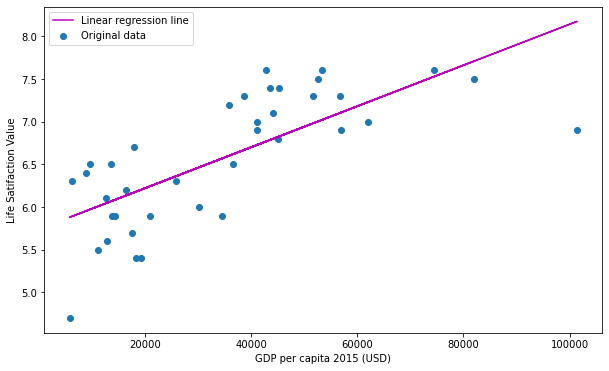

In [126]:
# I show that the sklearn module gives exactly the same results obtained above with the stats module.

yfit = model.predict(X.reshape(-1, 1))
fig, ax=plt.subplots(figsize=(10, 6))
ax.scatter(X.reshape(-1, 1), y.reshape(-1, 1), label="Original data")
ax.plot(X.reshape(-1, 1), yfit, color="m", label="Linear regression line")
ax.set_xlabel("GDP per capita 2015 (USD)")
ax.set_ylabel("Life Satifaction Value")
ax.legend()


In [127]:
# I print the values of slope and intercept coefficients for the linear model obtained using sklearn.
# The values agree with those obtained with the stats module.

print("Model slope: ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:  [2.39962998e-05]
Model intercept: [5.74175435]


In [128]:
# Now I make a test-train analyzis for the data in order to asses model accuracy
# in making new predictions. Here I split the data where only 20% of the data goes into the test set.

X_train, X_test, y_train, y_test=sk.model_selection.train_test_split(X.reshape(-1, 1), y.reshape(-1, 1), test_size=0.2, random_state=0)

In [129]:
# To test the model accuracy of the train-test analysis, First I try the linear regression model.

model1 = sk.linear_model.LinearRegression(fit_intercept=True)
model1.fit(X_train, y_train)

LinearRegression()

In [130]:
# I print the values of the slope and intercept coefficients obtained from the trainig data.

print("Model_1 slope: ", model1.coef_[0])
print("Model_1 intercept:", model1.intercept_)

Model_1 slope:  [3.08345433e-05]
Model_1 intercept: [5.54446493]


In [131]:
# I print the values of the generalized correlation coefficients R^2 of the train and test data of the linear regression model. 

print("Model_1 train R^2 value: ", model1.score(X_train, y_train))
print("Model_1 test R^2 value: ", model1.score(X_test, y_test))

Model_1 train R^2 value:  0.589117260119626
Model_1 test R^2 value:  -0.37033956276075175


In [132]:
# Second, I try the KNN regression model to test the accuracy of the train-test data analysis.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # I scale and fit-transform the training predictor data for better stability.
X_test_scaled = scaler.transform(X_test) # I scale the test predictor data.
model2 = sk.neighbors.KNeighborsRegressor(n_neighbors=3) # I use a value of K=3 which gives the best model accuracy.
model2.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [133]:
# I print the values of the generalized correlation coefficients R^2 of the train and test data of the KNN regression model.

print("Model train R^2 value: ", model2.score(X_train_scaled, y_train))
print("Model test R^2 value: ", model2.score(X_test_scaled, y_test))

Model train R^2 value:  0.6880950044165277
Model test R^2 value:  0.7714814814814819


In [134]:
# I create a for-loop to evaluate the RMSE and R^2 vules as a function of K to test the KNN model accuracy.
# The value of K=3 gives the best model accuracy.

rmse_val = [] # I create an empty list to store the root-mean-square values of the error.
R_score = [] # I create an empty list to store the values of R^2 score.
    
for K in range(0, 22):
    K = K+1
    model3 = sk.neighbors.KNeighborsRegressor(n_neighbors = K).fit(X_train_scaled, y_train)  #fit the model
    pred=model3.predict(X_test_scaled) # make prediction on test set
    error = np.sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    R_score.append(model3.score(X_test_scaled, y_test))
    print('RMSE and R^2 values for k=' , K , 'are respectively:', error, model3.score(X_test_scaled, y_test))

RMSE and R^2 values for k= 1 are respectively: 0.4373213921133974 0.4900000000000001
RMSE and R^2 values for k= 2 are respectively: 0.36012150727219816 0.6541666666666668
RMSE and R^2 values for k= 3 are respectively: 0.29273613450417124 0.7714814814814819
RMSE and R^2 values for k= 4 are respectively: 0.32198117180978103 0.7235416666666672
RMSE and R^2 values for k= 5 are respectively: 0.3267261850540906 0.7153333333333335
RMSE and R^2 values for k= 6 are respectively: 0.30709209621147127 0.7485185185185184
RMSE and R^2 values for k= 7 are respectively: 0.31719433301677885 0.7317006802721087
RMSE and R^2 values for k= 8 are respectively: 0.31957613529486195 0.7276562500000001
RMSE and R^2 values for k= 9 are respectively: 0.3482761781923885 0.6765432098765429
RMSE and R^2 values for k= 10 are respectively: 0.35677373782272703 0.6605666666666665
RMSE and R^2 values for k= 11 are respectively: 0.327635531226871 0.7137465564738292
RMSE and R^2 values for k= 12 are respectively: 0.3478605

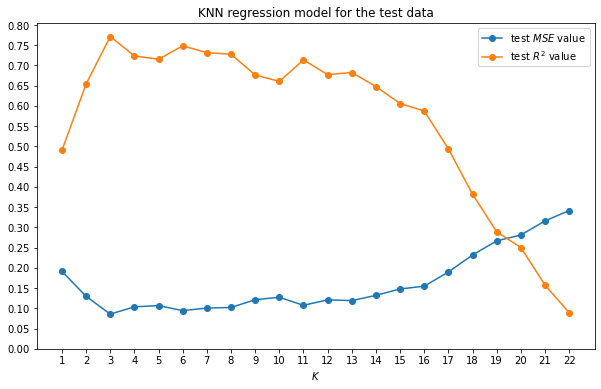

In [135]:
# I show the plot of the MSE and R^2 values vs. K values

K=np.arange(1, 23)

fig, ax=plt.subplots(figsize=(10, 6))
ax.plot(K, np.array(rmse_val)**2, label="test $MSE$ value",marker="o")
ax.plot(K, np.array(R_score), label="test $R^2$ value",marker="o")
ax.set_xlabel("$K$")
ax.set_xticks(K, minor=False)
ax.set_yticks(np.arange(0.0, 0.85, 0.05), minor=False)
ax.set_title("KNN regression model for the test data")
ax.legend()

In [136]:
# I print the predictions of the "Life Satisfaction Values" for Albania, UAE and Armenia using the model
# fitted with the training data for K=3.

print(model2.predict(scaler.transform(X_new)))

[[5.8       ]
 [7.06666667]
 [5.8       ]]
